In [2]:
import os
import sys
import pickle

import warnings
warnings.simplefilter('ignore')


import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import roc_curve, roc_auc_score

%load_ext autoreload
%autoreload 2

In [3]:
from zedstat import zedstat

In [4]:
F = "TASK_PLOTS"
os.makedirs(F, exist_ok = True)

# **Task 1**

In [4]:
TASK_FOLDER = "TASK_ASSETS/TASK1"
TASK_PLOTS_FOLDER = f"{F}/TASK1"
os.makedirs(TASK_PLOTS_FOLDER, exist_ok = True)

### **QDistances**

In [5]:
qdistances = pd.read_csv(f"{TASK_FOLDER}/QDISTANCES.csv")
qdistances.head(4)

,patient,MASKING_FRACTION,QSTEPS_PER_MASKED_COL,orig_to_masked,orig_to_restored,restored_masked_dist_ratio
0,0,0.35,100,0.002696,0.000174,0.064419
1,1,0.35,100,0.003078,0.000113,0.036850
2,2,0.35,100,0.003727,0.000229,0.061334
3,3,0.35,100,0.003159,0.000229,0.072345


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


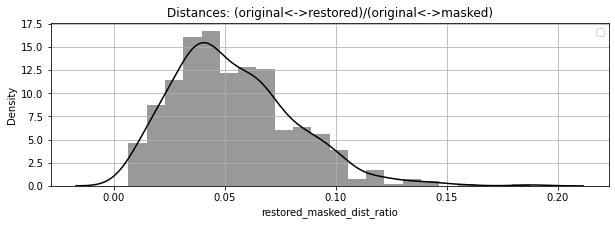

In [6]:
FIGSIZE = (10,3)

plt.figure(figsize = FIGSIZE)

sns.distplot(
    qdistances['restored_masked_dist_ratio'], 
    color = 'k'
)

plt.grid()
plt.legend()
plt.title(f"Distances: (original<->restored)/(original<->masked)")

plt.savefig(
    f"{TASK_PLOTS_FOLDER}/QDISTANCES.png", 
    bbox_inches = "tight", dpi = 300
)
plt.show()

### **Code prevalences in whole records**

In [7]:
CODE_PREVALS = pd.read_csv(
    f"{TASK_FOLDER}/CODE_PREVALENCES.csv"
)

In [8]:
CODE_PREVALS.sample(3)

,code,preval_original,preval_restored
292,C61,0.052,0.036
467,I24,0.016,0.010
226,I82,0.070,0.064


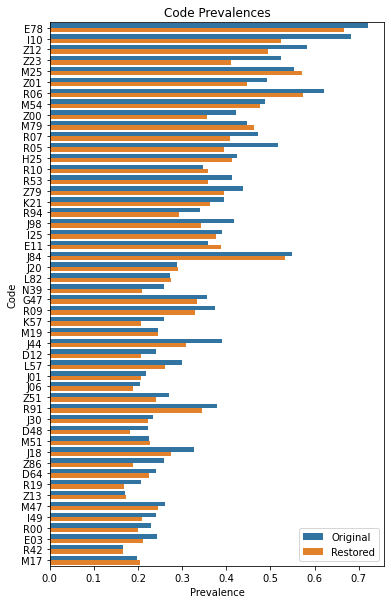

In [10]:
N_TOP_TO_PLOT = 50
FIGSIZE = (6,10)


plot_rename = {
    'preval_original': 'Original',
    'preval_restored': 'Restored'
}


df_melted = CODE_PREVALS.rename(columns = plot_rename).head(N_TOP_TO_PLOT).melt(
    id_vars='code', 
    value_vars=['Original', 'Restored'],
    var_name='Data source', value_name='Prevalence'
)

# Plot
plt.figure(figsize=FIGSIZE)
sns.barplot(data=df_melted, 
            y='code', x='Prevalence', 
            hue='Data source')

# Add labels and title
plt.ylabel('Code')
plt.xlabel('Prevalence')
plt.title(f'Code Prevalences')
plt.legend()

# Show the plot
plt.savefig(
    f"{TASK_PLOTS_FOLDER}/CODE_PREVALENCES.png", 
    bbox_inches = "tight", dpi = 300
)
plt.show()

# **Task 2**

In [11]:
TASK_FOLDER = "TASK_ASSETS/TASK2"
TASK_PLOTS_FOLDER = f"{F}/TASK2"
os.makedirs(TASK_PLOTS_FOLDER, exist_ok = True)

### **QDistances**

In [12]:
qdistances = pd.read_csv(f"{TASK_FOLDER}/QDISTANCES.csv")
qdistances.head(4)

,patient,QSTEPS_PER_MASKED_COL,orig_to_masked,orig_to_restored,restored_masked_dist_ratio
0,0,100,0.002591,0.000094,0.036099
1,1,100,0.003087,0.000172,0.055740
2,2,100,0.002505,0.000098,0.038961
3,3,100,0.003466,0.000370,0.106723


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


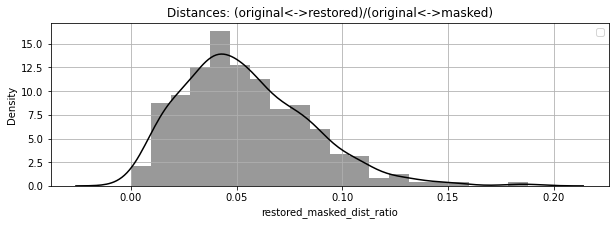

In [13]:
FIGSIZE = (10,3)

plt.figure(figsize = FIGSIZE)

sns.distplot(
    qdistances['restored_masked_dist_ratio'], 
    color = 'k'
)

plt.grid()
plt.legend()
plt.title(f"Distances: (original<->restored)/(original<->masked)")

plt.savefig(
    f"{TASK_PLOTS_FOLDER}/QDISTANCES.png", 
    bbox_inches = "tight", dpi = 300
)
plt.show()

### **Code prevalences in whole records**

In [14]:
CODE_PREVALS = pd.read_csv(
    f"{TASK_FOLDER}/CODE_PREVALENCES.csv"
)

In [15]:
CODE_PREVALS.sample(3)

,code,preval_original,preval_restored
468,S02,0.014,0.010
328,I69,0.042,0.032
74,R51,0.182,0.158


In [16]:
df_melted = CODE_PREVALS.head(N_TOP_TO_PLOT).melt(
    id_vars='code', 
    value_vars=['preval_original', 'preval_restored'],
    var_name='Condition', value_name='Prevalence'
)
df_melted

,code,Condition,Prevalence
0,E78,preval_original,0.712
1,I10,preval_original,0.658
2,Z12,preval_original,0.592
3,Z23,preval_original,0.542
4,M25,preval_original,0.584
...,...,...,...
95,I49,preval_restored,0.218
96,R00,preval_restored,0.154
97,E03,preval_restored,0.186
98,R42,preval_restored,0.256


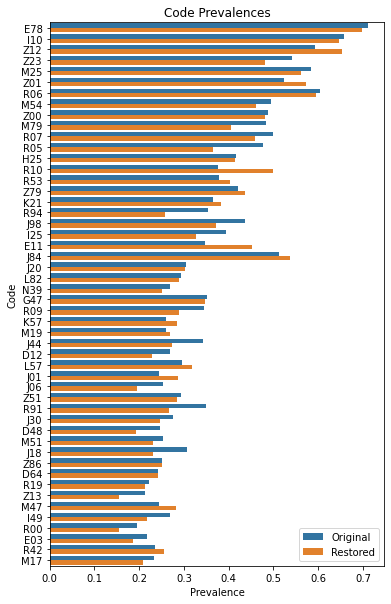

In [17]:
N_TOP_TO_PLOT = 50
FIGSIZE = (6,10)


plot_rename = {
    'preval_original': 'Original',
    'preval_restored': 'Restored'
}


df_melted = CODE_PREVALS.rename(columns = plot_rename).head(N_TOP_TO_PLOT).melt(
    id_vars='code', 
    value_vars=['Original', 'Restored'],
    var_name='Data source', value_name='Prevalence'
)

# Plot
plt.figure(figsize=FIGSIZE)
sns.barplot(data=df_melted, 
            y='code', x='Prevalence', 
            hue='Data source')

# Add labels and title
plt.ylabel('Code')
plt.xlabel('Prevalence')
plt.title(f'Code Prevalences')
plt.legend()

# Show the plot
plt.savefig(
    f"{TASK_PLOTS_FOLDER}/CODE_PREVALENCES.png", 
    bbox_inches = "tight", dpi = 300
)
plt.show()

# **Task 3**

In [18]:
TASK_FOLDER = "TASK_ASSETS/TASK3"
TASK_PLOTS_FOLDER = f"{F}/TASK3"
os.makedirs(TASK_PLOTS_FOLDER, exist_ok = True)

In [19]:
with open(
    f"{TASK_FOLDER}/BASE_CURVES.pkl", 
    "rb") as f:
    CURVES = pickle.load(f)

CURVE_CONCATENATION = pd.concat([
    CURVE[['fpr', 'tpr', 'threshold']] for CURVE in CURVES.values()
])

CURVE_CONCATENATION = pd.concat([CURVE[['fpr', 'tpr', 'threshold']] for CURVE in CURVES.values()])

## **Curves**

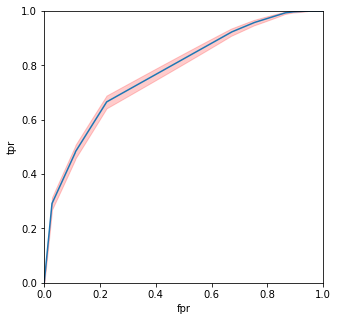

AUC:
(0.7769543393782383, 0.792938521242865, 0.7609701575136116)


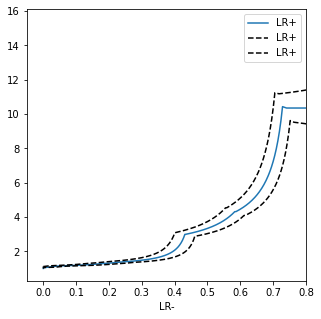

In [20]:
PATIENT_NUMBERS = {
    "total": 1580,
    "positive": 1544
}

zt=zedstat.processRoc(
    df = CURVE_CONCATENATION,
    order=3,
    total_samples = PATIENT_NUMBERS['total'],
    positive_samples = PATIENT_NUMBERS['positive'],
    alpha=0.05,
    prevalence = 0.75
)

zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)
zt.getBounds()

plt.figure(figsize=[5,5])
ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax)
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='r',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr')
plt.savefig(
    f"{TASK_PLOTS_FOLDER}/ROC.png",
    bbox_inches = "tight", dpi = 300
)
plt.show()

print("AUC:")
print(zt.auc())

zf=zt.get()
zfu=zt.df_lim['U']
zfl=zt.df_lim['L']
plt.figure(figsize=[5,5])
ax=plt.gca()
ax=(0.5*(zfu+zfl)).plot(
    ax=ax,
    x='LR-',
    y='LR+'
)
zfu.plot(ax=ax,x='LR-',y='LR+',style='--k')
zfl.plot(ax=ax,x='LR-',y='LR+',style='--k')
ax.set_xlim(None, 0.8)
plt.savefig(
    f"{TASK_PLOTS_FOLDER}/LR.png",
    bbox_inches = "tight", dpi = 300
)
plt.show()

# **Task 4**

In [5]:
TASK_FOLDER = "TASK_ASSETS/TASK4"
TASK_PLOTS_FOLDER = f"{F}/TASK4"
os.makedirs(TASK_PLOTS_FOLDER, exist_ok = True)

## **N code stats**

n_codes


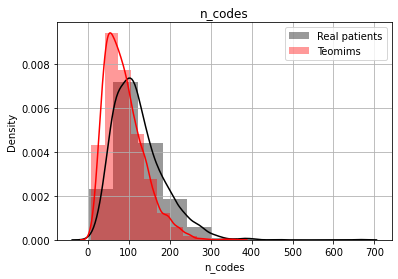

min_age


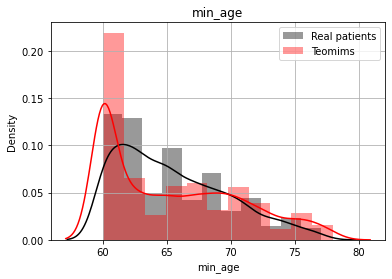

max_age


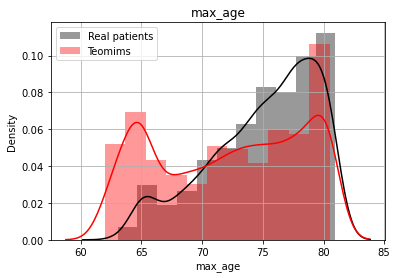

age_span


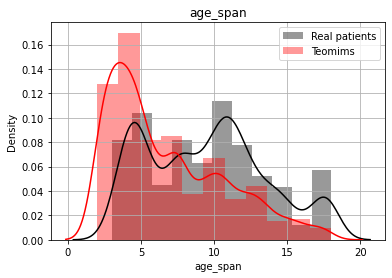

codes_yearly_density


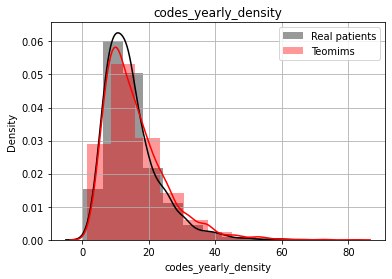

In [8]:
REAL_STATS = pd.read_csv(f"{TASK_FOLDER}/REAL_PATIENT_CODE_STATS.csv")
TEOMIM_STATS = pd.read_csv(f"{TASK_FOLDER}/TEOMIM_CODE_STATS.csv")

FIGSIZE = (6,4)
for col in list(TEOMIM_STATS.columns):
    print(col)
    
    plt.figure(figsize = FIGSIZE)
    
    sns.distplot(REAL_STATS[col], 
                 label = f"Real patients",
                 bins = 11,
                 color = 'k')
    
    sns.distplot(TEOMIM_STATS[col], 
                 label = f"Teomims",
                 bins = 11,
                 color = 'r')
    
    plt.title(f"{col}")
    plt.grid()
    plt.legend()
    plt.title(col)
    plt.savefig(
        f"{TASK_PLOTS_FOLDER}/distributions_{col}.png",
        dpi = 300, bbox_inches = "tight"
    )
    plt.show()

## **Code Prevalences**

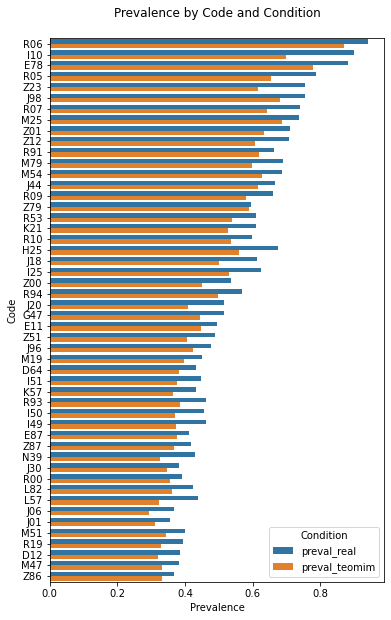

In [11]:
CODE_PREVALS = pd.read_csv(f"{TASK_FOLDER}/CODE_PREVALENCE_STATS.csv")

# Melt the DataFrame for seaborn
N_TOP_CODES = 50
df = CODE_PREVALS.head(N_TOP_CODES)

df_melted = CODE_PREVALS.head(N_TOP_CODES).melt(
    id_vars='code', 
    value_vars=['preval_real', 'preval_teomim'],
    var_name='Condition', value_name='Prevalence'
)

# Plot
plt.figure(figsize=(6,10))
sns.barplot(data=df_melted, y='code', x='Prevalence', hue='Condition')

# Add labels and title
plt.ylabel('Code')
plt.xlabel('Prevalence')
plt.title('Prevalence by Code and Condition\n')
plt.legend(title='Condition')
# Show the plot
plt.savefig(
    f"{TASK_PLOTS_FOLDER}/code_prevalences.png",
    dpi = 300, bbox_inches = "tight"
)
plt.show()

## **Correlations in qnet data**

In [14]:
N_EACH = 50

In [15]:
CORR_MATRIX_TRAINING = pickle.load( 
    open(f"{TASK_FOLDER}/CM_TRAINING.pkl", "rb")
)

CORR_MATRIX_VALID = pickle.load( 
    open(f"{TASK_FOLDER}/CM_VALIDATION.pkl", "rb")
)

CORR_MATRIX_SAME_SEED = pickle.load(
    open(f"{TASK_FOLDER}/CM_SAME_SEED.pkl", "rb")
)

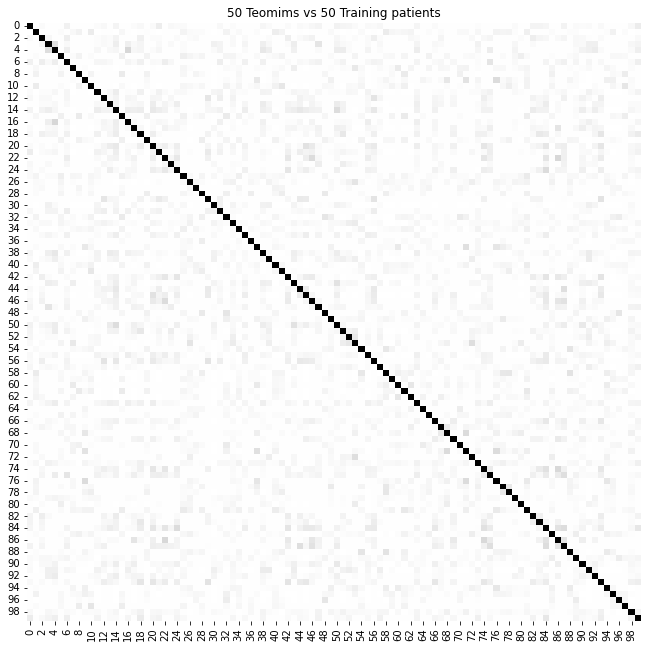

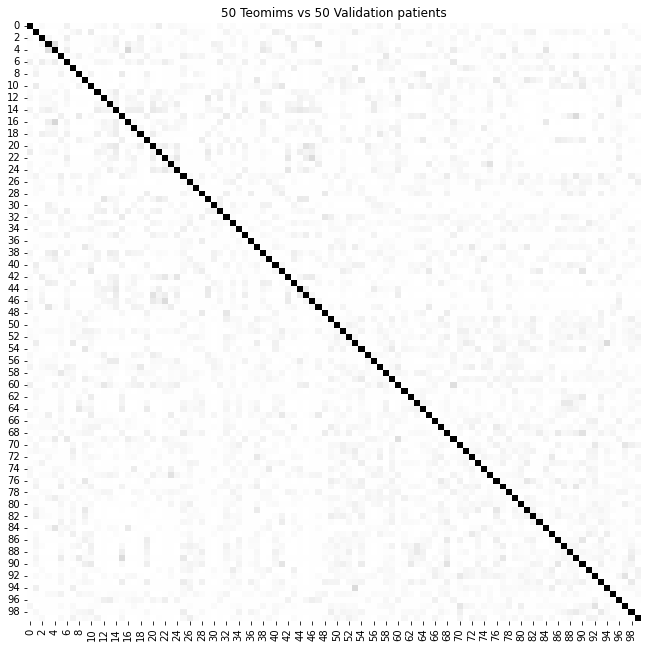

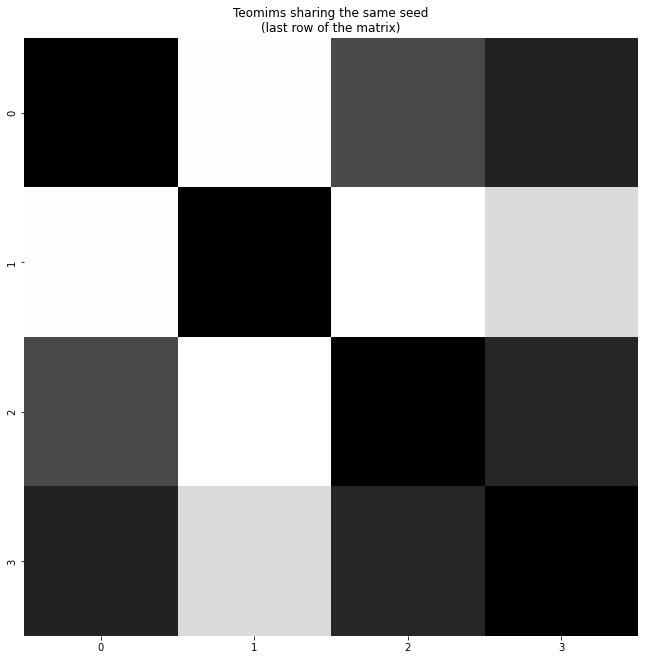

In [16]:
plt.figure(figsize = (11,11)) 
with sns.plotting_context(font_scale=1.5):
    sns.heatmap(CORR_MATRIX_TRAINING, cmap="binary", cbar=False) # 

plt.title(f"{N_EACH} Teomims vs {N_EACH} Training patients")

plt.savefig(
    f"{TASK_PLOTS_FOLDER}/CORR_teomims_training.png",
    dpi = 300, bbox_inches = "tight"
)
plt.show()


plt.figure(figsize = (11,11)) 
with sns.plotting_context(font_scale=1.5):
    sns.heatmap(CORR_MATRIX_VALID, cmap="binary", cbar=False) # binary

plt.title(f"{N_EACH} Teomims vs {N_EACH} Validation patients")

plt.savefig(
    f"{TASK_PLOTS_FOLDER}/CORR_teomims_validation.png",
    dpi = 300, bbox_inches = "tight"
)
plt.show()


plt.figure(figsize = (11,11))
with sns.plotting_context(font_scale=1.5):
    sns.heatmap(CORR_MATRIX_SAME_SEED, cmap="binary", cbar=False) # binary

plt.title(f"Teomims sharing the same seed\n(last row of the matrix)")
plt.savefig(
    f"{TASK_PLOTS_FOLDER}/CORR_multiple_teomims_from_same_original.png",
    dpi = 300, bbox_inches = "tight"
)
plt.show()

## **AUCs for distinguishability runs**

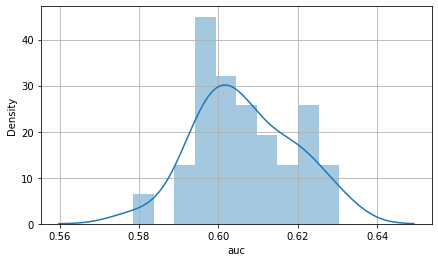

In [20]:
PERFORMANCE_DF = pd.read_csv(
    f"{TASK_FOLDER}/CLF_AUCS.csv",
)

plt.figure(figsize = (7,4))
sns.distplot(PERFORMANCE_DF.auc, bins = 10)
plt.grid()
plt.savefig(
    f"{TASK_PLOTS_FOLDER}/CLF_AUCS.png",
    dpi = 300, bbox_inches = "tight"
)
plt.show()